Some quick visualizations of the model output

In [6]:
#high level modules
import os
import sys
import imp
import numpy as np
import pandas as pd
import pickle

# ml/ai modules
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# import pydot
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors

# custom modules
this_dir = "/Users/steeleb/Documents/GitHub/ATS-ML-Fall2023/"
imp.load_source("tvt", os.path.join(this_dir, "02_preprocessing.py"))
from tvt import training
from tvt import train1, val1, train2, val2, train3, val3, train4, val4, train5, val5, train6, val6
from tvt import train1_ts, val1_ts, train2_ts, val2_ts, train3_ts, val3_ts, train4_ts, val4_ts
imp.load_source("universals", os.path.join(this_dir, "universal_functions.py"))
from universals import load_pickle_file, get_features_labels, predict_values, print_error_metrics
imp.load_source("vis", os.path.join(this_dir, "NeuralNetworks/vis_functions.py"))
from vis import create_scatter_plot

Load in models from pickle files

In [7]:
# model directory path
model_dir = '/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/models/leaky_basic/'

histories = [f for f in os.listdir(model_dir) if 'history' in f]

ts_histories = [f for f in histories if 'ts' in f]
ts_histories.sort()

histories = [f for f in histories if 'ts' not in f]
histories.sort()

ts_history_1 = load_pickle_file(ts_histories[0], model_dir)
ts_history_2 = load_pickle_file(ts_histories[1], model_dir)
ts_history_3 = load_pickle_file(ts_histories[2], model_dir)
ts_history_4 = load_pickle_file(ts_histories[3], model_dir)

history_1 = load_pickle_file(histories[0], model_dir)
history_2 = load_pickle_file(histories[1], model_dir)
history_3 = load_pickle_file(histories[2], model_dir)
history_4 = load_pickle_file(histories[3], model_dir)
history_5 = load_pickle_file(histories[4], model_dir)
history_6 = load_pickle_file(histories[5], model_dir)

Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-12-12 21:47:20.956980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-12 21:47:20.957115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


And now we'll look at the training and validation loss and accuracy for each model

Text(0.5, 0.98, 'LOO dataset 1')

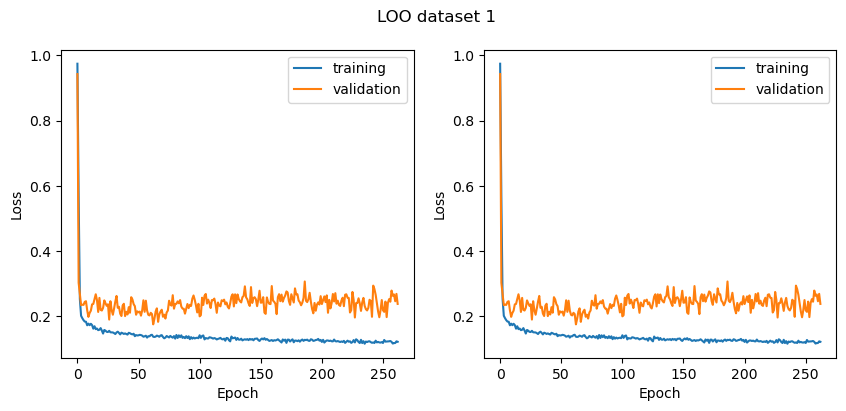

In [8]:
fig1, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_1.history["loss"], label="training")
axs[0].plot(history_1.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_1.history["loss"], label="training")
axs[1].plot(history_1.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig1.suptitle("LOO dataset 1")


Text(0.5, 0.98, 'LOO dataset 2')

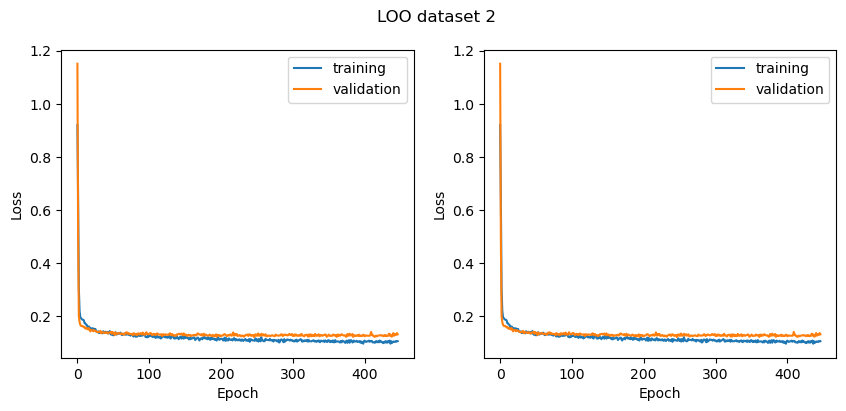

In [23]:
fig2, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_2.history["loss"], label="training")
axs[0].plot(history_2.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_2.history["loss"], label="training")
axs[1].plot(history_2.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig2.suptitle("LOO dataset 2")

Text(0.5, 0.98, 'LOO dataset 3')

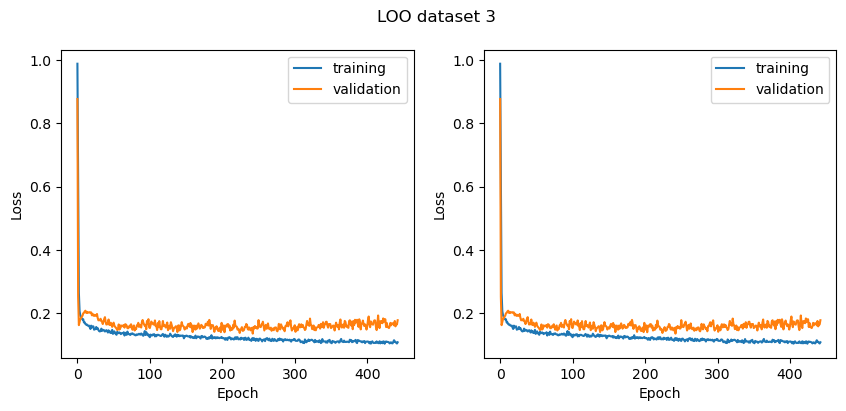

In [24]:
fig3, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_3.history["loss"], label="training")
axs[0].plot(history_3.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_3.history["loss"], label="training")
axs[1].plot(history_3.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig3.suptitle("LOO dataset 3")

Text(0.5, 0.98, 'LOO dataset 4')

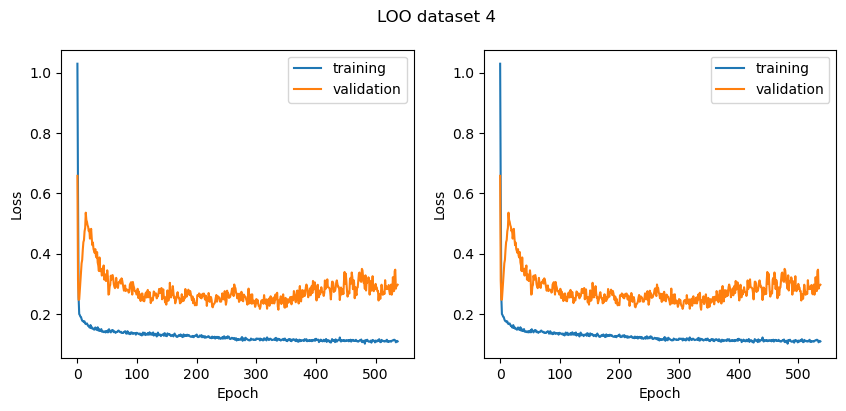

In [25]:
fig4, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_4.history["loss"], label="training")
axs[0].plot(history_4.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_4.history["loss"], label="training")
axs[1].plot(history_4.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig4.suptitle("LOO dataset 4")

Text(0.5, 0.98, 'LOO dataset 5')

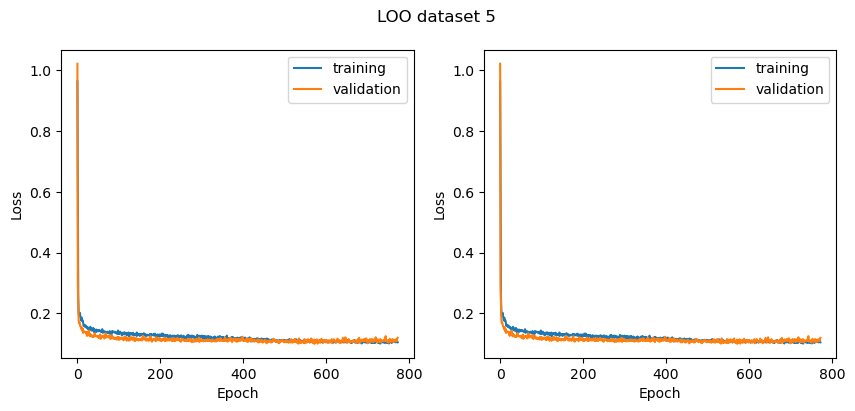

In [26]:
fig5, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_5.history["loss"], label="training")
axs[0].plot(history_5.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_5.history["loss"], label="training")
axs[1].plot(history_5.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig5.suptitle("LOO dataset 5")


Text(0.5, 0.98, 'LOO dataset 6')

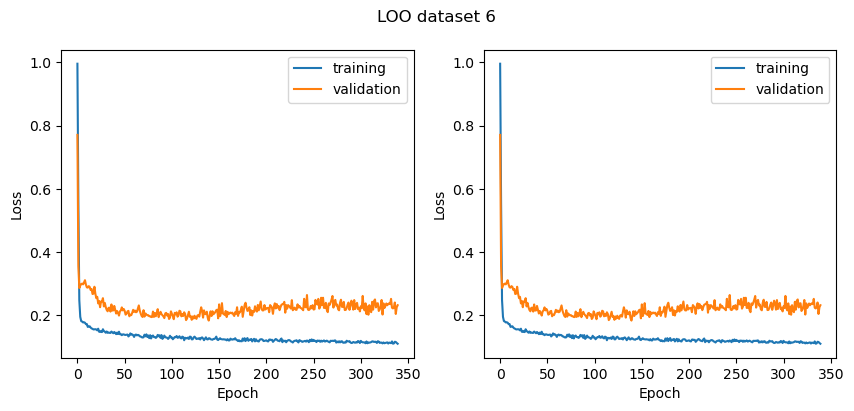

In [27]:
fig6, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_6.history["loss"], label="training")
axs[0].plot(history_6.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_6.history["loss"], label="training")
axs[1].plot(history_6.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig6.suptitle("LOO dataset 6")


Text(0.5, 0.98, 'TS dataset 1')

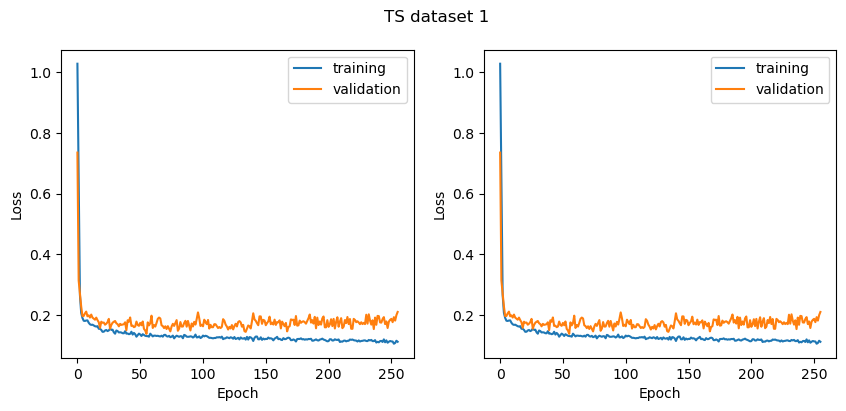

In [28]:
fig1ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_1.history["loss"], label="training")
axs[0].plot(ts_history_1.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_1.history["loss"], label="training")
axs[1].plot(ts_history_1.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig1ts.suptitle("TS dataset 1")


Text(0.5, 0.98, 'TS dataset 2')

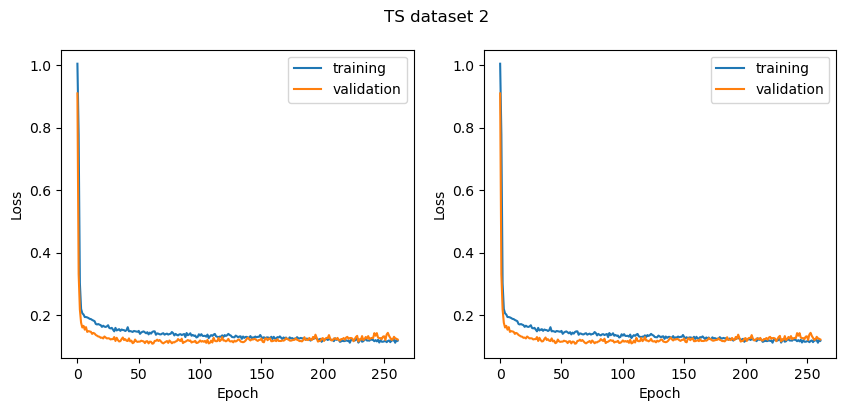

In [29]:
fig2ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_2.history["loss"], label="training")
axs[0].plot(ts_history_2.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_2.history["loss"], label="training")
axs[1].plot(ts_history_2.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig2ts.suptitle("TS dataset 2")

Text(0.5, 0.98, 'TS dataset 3')

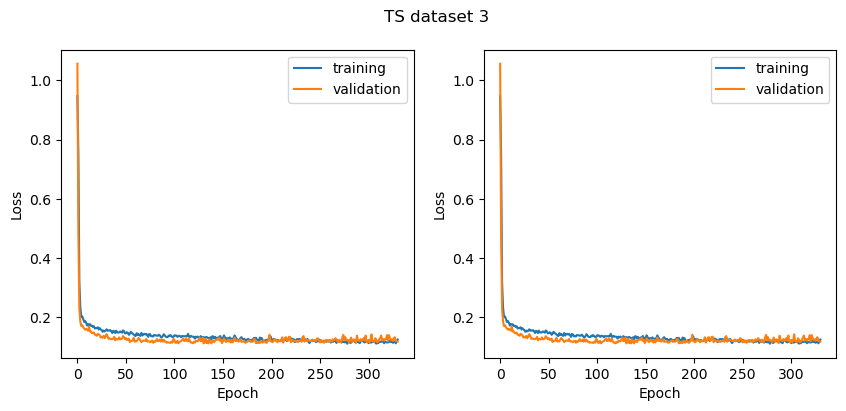

In [30]:
fig3ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_3.history["loss"], label="training")
axs[0].plot(ts_history_3.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_3.history["loss"], label="training")
axs[1].plot(ts_history_3.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig3ts.suptitle("TS dataset 3")

Text(0.5, 0.98, 'TS dataset 4')

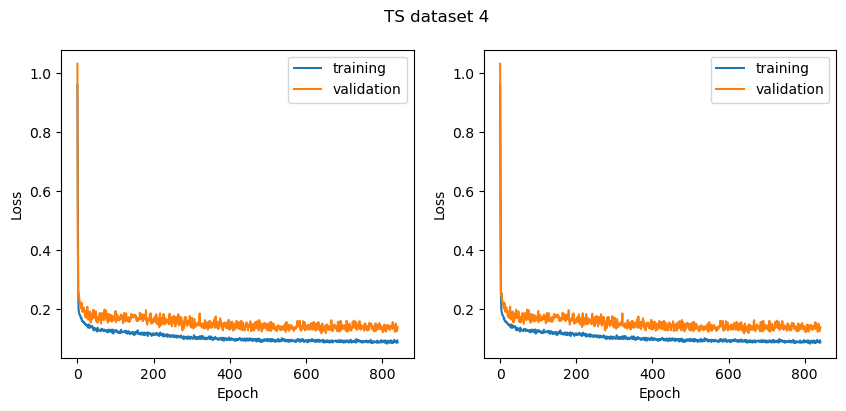

In [31]:
fig4ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_4.history["loss"], label="training")
axs[0].plot(ts_history_4.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_4.history["loss"], label="training")
axs[1].plot(ts_history_4.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig4ts.suptitle("TS dataset 4")

Import data, models and look at actual values

In [9]:
features1, labels_1, val_features1, val_labels_1 = get_features_labels(train1, val1)
features2, labels_2, val_features2, val_labels_2 = get_features_labels(train2, val2)
features3, labels_3, val_features3, val_labels_3 = get_features_labels(train3, val3)
features4, labels_4, val_features4, val_labels_4 = get_features_labels(train4, val4)
features5, labels_5, val_features5, val_labels_5 = get_features_labels(train5, val5)
features6, labels_6, val_features6, val_labels_6 = get_features_labels(train6, val6)

ts_features1, ts_labels_1, ts_val_features1, ts_val_labels_1 = get_features_labels(train1_ts, val1_ts)
ts_features2, ts_labels_2, ts_val_features2, ts_val_labels_2 = get_features_labels(train2_ts, val2_ts)
ts_features3, ts_labels_3, ts_val_features3, ts_val_labels_3 = get_features_labels(train3_ts, val3_ts)
ts_features4, ts_labels_4, ts_val_features4, ts_val_labels_4 = get_features_labels(train4_ts, val4_ts)


In [33]:
models = [f for f in os.listdir(model_dir) if 'history' not in f]

ts_models = [f for f in models if 'ts' in f]
ts_models.sort()

models = [f for f in models if 'ts' not in f]
models.sort()

ts_model_1 = load_pickle_file(ts_models[0], model_dir)
ts_model_2 = load_pickle_file(ts_models[1], model_dir)
ts_model_3 = load_pickle_file(ts_models[2], model_dir)
ts_model_4 = load_pickle_file(ts_models[3], model_dir)

model_1 = load_pickle_file(models[0], model_dir)
model_2 = load_pickle_file(models[1], model_dir)
model_3 = load_pickle_file(models[2], model_dir)
model_4 = load_pickle_file(models[3], model_dir)
model_5 = load_pickle_file(models[4], model_dir)
model_6 = load_pickle_file(models[5], model_dir)

In [12]:
features1

,elevation,area,shoreline_length,max_depth,volume,temp_cum_sum,rad_cum_sum,max_temp_degC_1,mean_temp_degC_1,min_temp_degC_1,...,tot_precip_mm_5,min_wind_mps_1,mean_wind_mps_1,max_wind_mps_1,min_wind_mps_3,mean_wind_mps_3,max_wind_mps_3,min_wind_mps_5,mean_wind_mps_5,max_wind_mps_5
0,-1.043521,-0.143216,0.611207,0.125842,-0.042598,-1.024122,-2.152616,-0.896125,-0.579240,-0.299579,...,-0.381770,-0.179723,0.023816,-0.345535,-1.479168,-0.309362,0.510497,-0.907353,-0.730324,-0.282322
1,1.047988,-0.357799,-0.751022,-1.549727,-0.799682,-1.522910,-2.062355,-1.923542,-1.668296,-1.265751,...,0.541973,1.497464,0.828695,0.480575,1.346773,0.792326,0.288314,1.129811,0.442338,-0.182177
2,-1.043521,-0.143216,0.611207,0.125842,-0.042598,-0.851872,-1.613833,0.359274,0.615267,0.634046,...,-0.605692,-1.014228,-1.156364,-0.993970,-0.671619,-0.478955,-0.863410,-0.128020,-0.222925,-0.732947
3,1.047988,-0.357799,-0.751022,-1.549727,-0.799682,-1.520601,-1.530374,-0.593149,-0.419564,-0.410928,...,-0.318351,1.685245,1.622710,1.367703,1.985739,2.103099,1.929836,2.057424,2.052839,1.857847
4,-1.043521,-0.143216,0.611207,0.125842,-0.042598,-0.721222,-1.426184,0.767242,0.647593,0.488435,...,-0.592629,0.014393,-0.433196,-0.745136,-0.729113,-0.903609,-0.434120,-0.261259,-0.212639,0.426650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,1.047988,-0.357799,-0.751022,-1.549727,-0.799682,0.352719,1.293594,-0.875126,-0.794966,-0.623349,...,-1.267586,2.867678,3.037391,1.850506,3.864471,4.181237,3.030770,3.419282,4.129587,3.398246
3092,-0.808520,-0.462536,-0.430498,-0.064563,-0.257276,2.209948,1.467606,-1.326590,-1.442469,-1.421641,...,0.680830,0.094757,-0.027154,-0.667008,0.432717,-0.087516,-0.877226,0.283758,-0.288801,-0.984420
3093,-1.043521,-0.143216,0.611207,0.125842,-0.042598,1.954914,1.388808,-1.431582,-1.571317,-1.520999,...,0.830297,0.274113,-0.230299,-0.824388,0.761692,0.056339,-0.721989,0.730272,0.057839,-0.716775
3094,-0.808520,-0.462536,-0.430498,-0.064563,-0.257276,2.216650,1.477793,-1.337089,-1.023922,-0.659324,...,0.243169,-0.023739,-0.834041,-1.018253,0.239140,-0.380622,-1.007227,0.115389,-0.670223,-1.218363


In [ ]:
transform = pd.read_csv('/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/mean_std_training_v2023-11-09.csv')
transform.set_index(transform.columns[0], inplace=True)

t_mean = transform.loc['value']['mean']
t_std = transform.loc['value']['std']

# Call predict_values for each dataset
p_act_1, l_act_1, p_v_act_1, l_v_act_1 = predict_values(model_1, features1, val_features1, labels_1, val_labels_1, t_mean, t_std)
p_act_2, l_act_2, p_v_act_2, l_v_act_2 = predict_values(model_2, features2, val_features2, labels_2, val_labels_2, t_mean, t_std)
p_act_3, l_act_3, p_v_act_3, l_v_act_3 = predict_values(model_3, features3, val_features3, labels_3, val_labels_3, t_mean, t_std)
p_act_4, l_act_4, p_v_act_4, l_v_act_4 = predict_values(model_4, features4, val_features4, labels_4, val_labels_4, t_mean, t_std)
p_act_5, l_act_5, p_v_act_5, l_v_act_5 = predict_values(model_5, features5, val_features5, labels_5, val_labels_5, t_mean, t_std)
p_act_6, l_act_6, p_v_act_6, l_v_act_6 = predict_values(model_6, features6, val_features6, labels_6, val_labels_6, t_mean, t_std)

p_act_1_ts, l_act_1_ts, p_v_act_1_ts, l_v_act_1_ts = predict_values(ts_model_1, ts_features1, ts_val_features1, ts_labels_1, ts_val_labels_1, t_mean, t_std)
p_act_2_ts, l_act_2_ts, p_v_act_2_ts, l_v_act_2_ts = predict_values(ts_model_2, ts_features2, ts_val_features2, ts_labels_2, ts_val_labels_2, t_mean, t_std)
p_act_3_ts, l_act_3_ts, p_v_act_3_ts, l_v_act_3_ts = predict_values(ts_model_3, ts_features3, ts_val_features3, ts_labels_3, ts_val_labels_3, t_mean, t_std)
p_act_4_ts, l_act_4_ts, p_v_act_4_ts, l_v_act_4_ts = predict_values(ts_model_4, ts_features4, ts_val_features4, ts_labels_4, ts_val_labels_4, t_mean, t_std)


10/10 [==============================] - 0s 3ms/step


2023-11-10 10:05:46.895003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 2ms/step


2023-11-10 10:05:47.130223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 3ms/step


2023-11-10 10:05:47.360184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 3ms/step


2023-11-10 10:05:47.594733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 2ms/step


2023-11-10 10:05:47.836792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/9 [==>...........................] - ETA: 0s

2023-11-10 10:05:48.070885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 2ms/step


2023-11-10 10:05:48.323917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 2ms/step


2023-11-10 10:05:48.557970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/22 [>.............................] - ETA: 0s

2023-11-10 10:05:48.789218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-10 10:05:48.933900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 2ms/step


2023-11-10 10:05:49.044068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


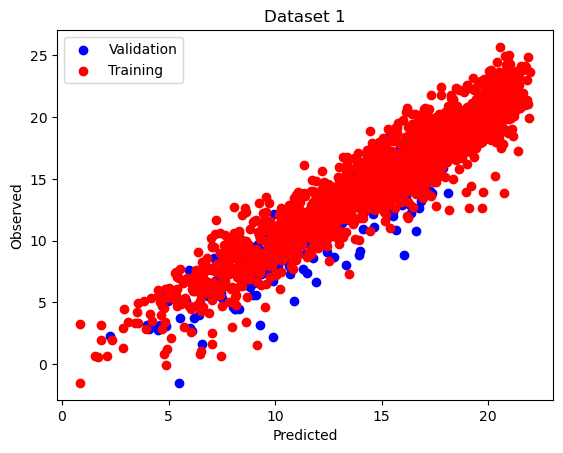

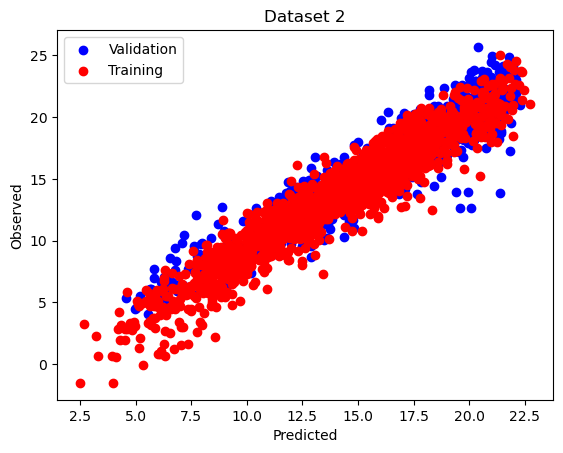

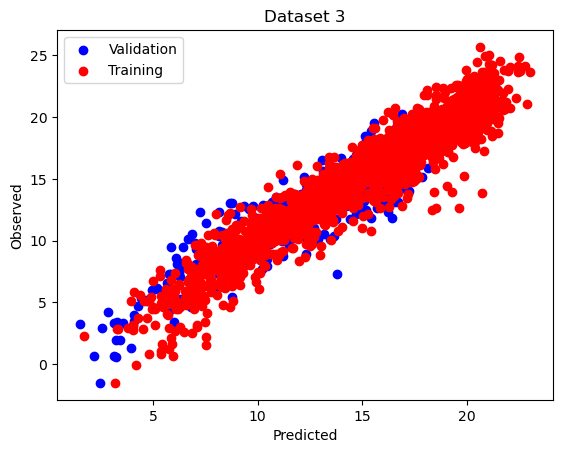

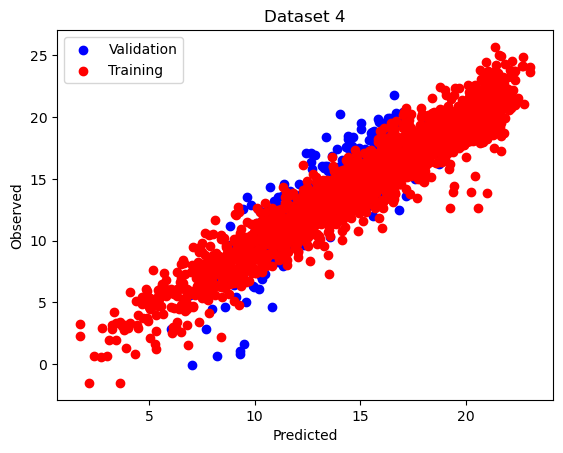

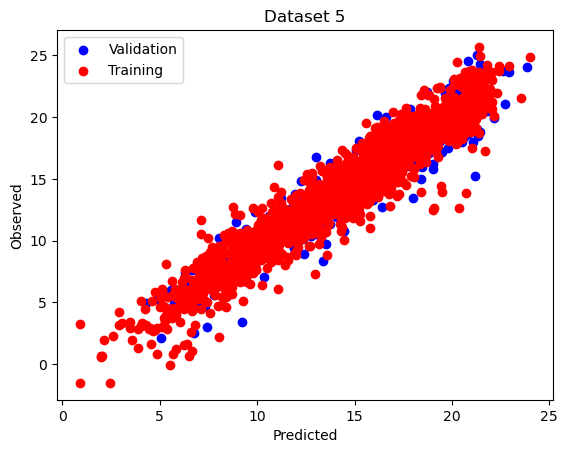

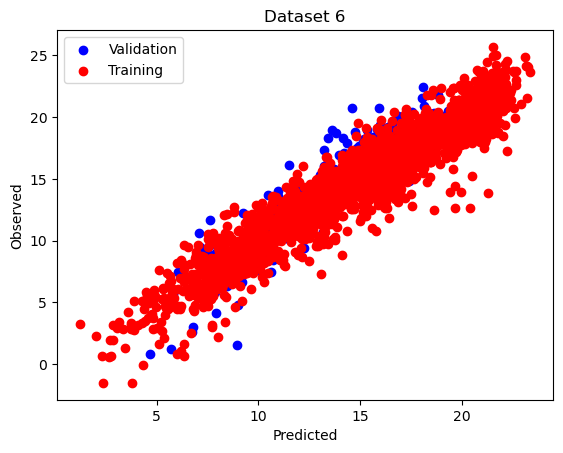

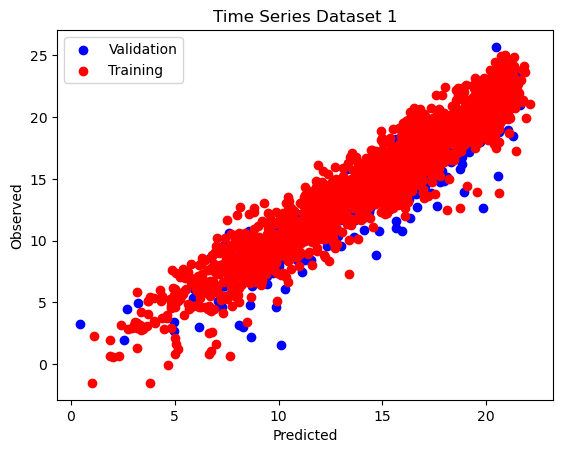

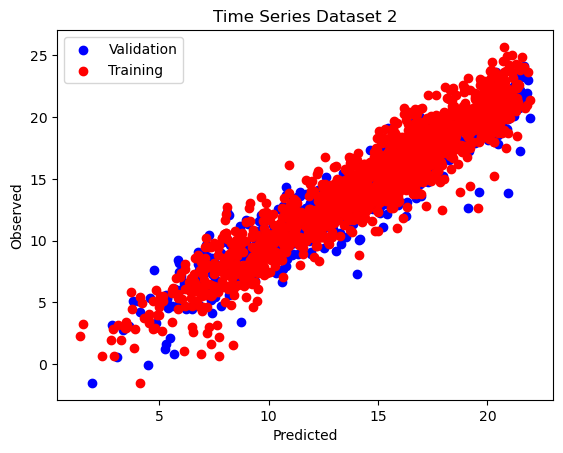

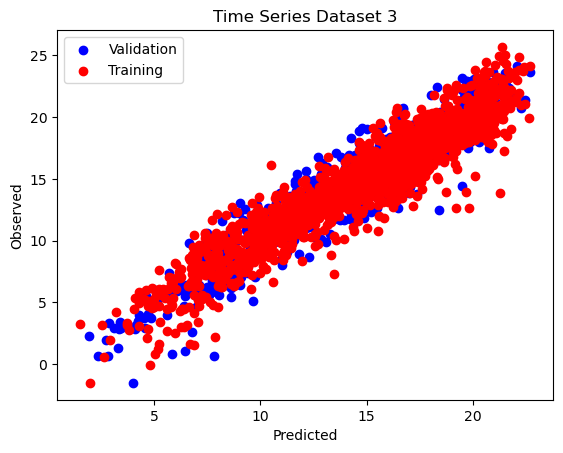

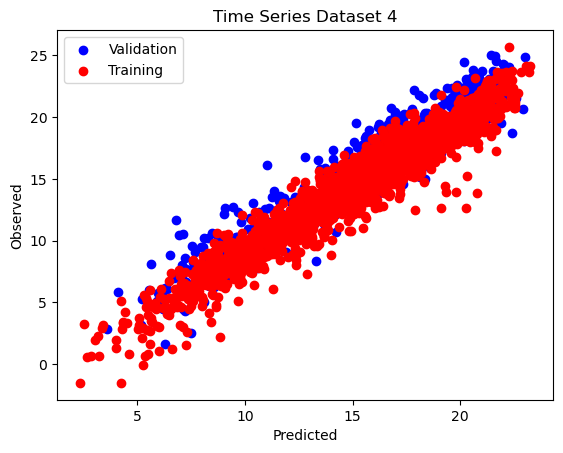

In [ ]:
create_scatter_plot('Dataset 1', p_v_act_1, l_v_act_1, p_act_1, l_act_1)
create_scatter_plot('Dataset 2', p_v_act_2, l_v_act_2, p_act_2, l_act_2)
create_scatter_plot('Dataset 3', p_v_act_3, l_v_act_3, p_act_3, l_act_3)
create_scatter_plot('Dataset 4', p_v_act_4, l_v_act_4, p_act_4, l_act_4)
create_scatter_plot('Dataset 5', p_v_act_5, l_v_act_5, p_act_5, l_act_5)
create_scatter_plot('Dataset 6', p_v_act_6, l_v_act_6, p_act_6, l_act_6)

create_scatter_plot('Time Series Dataset 1', p_v_act_1_ts, l_v_act_1_ts, p_act_1_ts, l_act_1_ts)
create_scatter_plot('Time Series Dataset 2', p_v_act_2_ts, l_v_act_2_ts, p_act_2_ts, l_act_2_ts)
create_scatter_plot('Time Series Dataset 3', p_v_act_3_ts, l_v_act_3_ts, p_act_3_ts, l_act_3_ts)
create_scatter_plot('Time Series Dataset 4', p_v_act_4_ts, l_v_act_4_ts, p_act_4_ts, l_act_4_ts)


In [ ]:
# loop through datasets 1-6
for i in range(1, 7):
    l_act = globals()["l_act_" + str(i)]
    p_act = globals()["p_act_" + str(i)]
    l_v_act = globals()["l_v_act_" + str(i)]
    p_v_act = globals()["p_v_act_" + str(i)]
    print_error_metrics(i, l_act, p_act, l_v_act, p_v_act)

# loop through time series datasets 1-4
for i in range(1, 5):
    ts_l_act = globals()["l_act_" + str(i) + "_ts"]
    ts_p_act = globals()["p_act_" + str(i) + "_ts"]
    ts_l_v_act = globals()["l_v_act_" + str(i) + "_ts"]
    ts_p_v_act = globals()["p_v_act_" + str(i) + "_ts"]
    print("TIME SERIES DATASET", i)
    print_error_metrics(i, ts_l_act, ts_p_act, ts_l_v_act, ts_p_v_act)


DATASET 1
Mean Squared Error for Training Dataset 1 : 2.523983947847722
Mean Absolute Error for Training Dataset 1 : 1.2133124477262984
Mean Squared Error for Validation Dataset 1 : 3.9987038567738113
Mean Absolute Error for Validation Dataset 1 : 1.478948401260043
 
DATASET 2
Mean Squared Error for Training Dataset 2 : 2.2447456998024453
Mean Absolute Error for Training Dataset 2 : 1.1434258718313508
Mean Squared Error for Validation Dataset 2 : 2.788221239016582
Mean Absolute Error for Validation Dataset 2 : 1.2614746422981247
 
DATASET 3
Mean Squared Error for Training Dataset 3 : 2.1651626498736656
Mean Absolute Error for Training Dataset 3 : 1.1212189796648255
Mean Squared Error for Validation Dataset 3 : 3.1072977943185363
Mean Absolute Error for Validation Dataset 3 : 1.399829311045991
 
DATASET 4
Mean Squared Error for Training Dataset 4 : 2.1820796209082753
Mean Absolute Error for Training Dataset 4 : 1.1451806614016065
Mean Squared Error for Validation Dataset 4 : 4.873492465

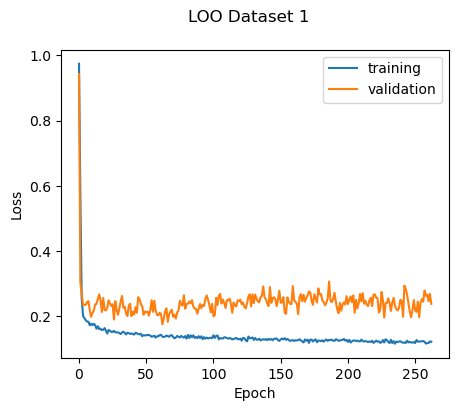

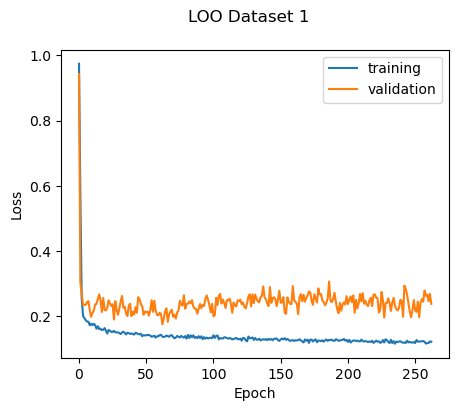

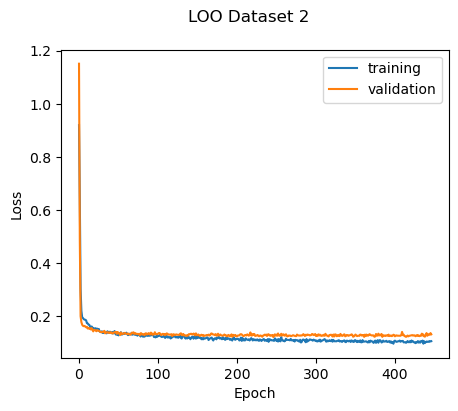

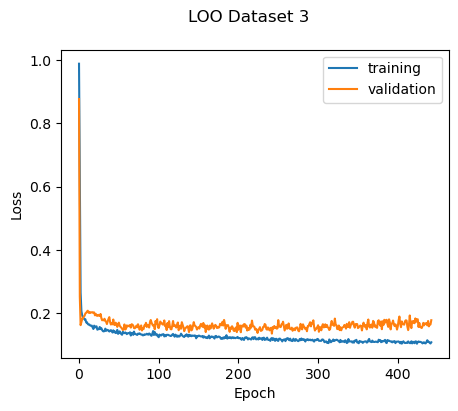

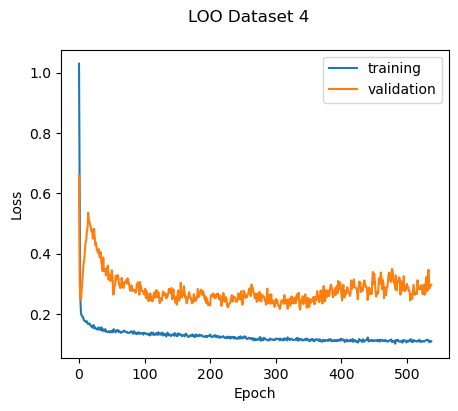

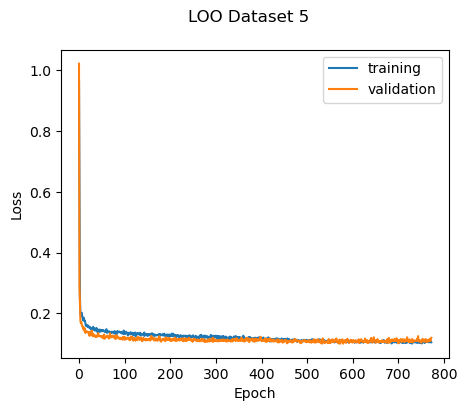

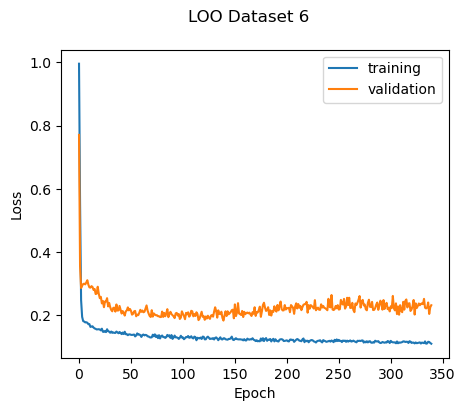

In [ ]:
imp.load_source("loss_plots", os.path.join(this_dir, "NeuralNetworks/for_quarto/history_loss_plots.py"))
from loss_plots import fig1, fig2, fig3, fig4, fig5, fig6

fig1